### This notebook is motivated by the Data Analysis workshop BOOK.

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [107]:
data = pd.read_csv('https://raw.githubusercontent.com'\
                   '/PacktWorkshops/The-Data-Analysis-Workshop'\
                   '/master/Chapter02/data/'\
                   'Absenteeism_at_work.csv', sep=";")
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


### Descriptive Statistics 
- As a rule of thumb it is a good thing to start the analysis by displaying the shape, missing values, types of columns and a discription about the data.

- By using the info() function we can easily find the shape,  NO missing values and types of columns.

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

- Using the describe function to show the description of the numerical data.

In [109]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


##  Data Preprocessing
- As we want to go through the analysis we need to have labels on the columns values instead of numbers. So We will start to label our columns values in the next cell.

In [110]:
# define encoding dictionaries
month_encoding = {1: "January", 2: "February", 3: "March", \
                  4: "April", 5: "May", 6: "June", 7: "July", \
                  8: "August", 9: "September", 10: "October", \
                  11: "November", 12: "December", 0: "Unknown"}

dow_encoding = {2: "Monday", 3: "Tuesday", 4: "Wednesday", \
                5: "Thursday", 6: "Friday"}

season_encoding = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

education_encoding = {1: "high_school", 2: "graduate", \
                      3: "postgraduate", 4: "master_phd"}

yes_no_encoding = {0: "No", 1: "Yes"}

In [111]:
# backtransform numerical variables to categorical
preprocessed_data = data.copy()

preprocessed_data["Month of absence"] = preprocessed_data['Month of absence'].map(month_encoding)

preprocessed_data["Day of the week"] = preprocessed_data["Day of the week"].map(dow_encoding)
                                              
preprocessed_data["Seasons"] = preprocessed_data["Seasons"].map(season_encoding)

preprocessed_data["Education"] = preprocessed_data["Education"].map(education_encoding)

preprocessed_data["Disciplinary failure"] = preprocessed_data["Disciplinary failure"].map(yes_no_encoding)

preprocessed_data["Social drinker"] = preprocessed_data["Social drinker"].map(yes_no_encoding)

preprocessed_data["Social smoker"] = preprocessed_data["Social smoker"].map(yes_no_encoding)

# transform columns
preprocessed_data.head().T


,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


- We will put labels on the 'Reason for absence' column as we need to do analysis on it.
- Note that only values 1 to 21 represent ICD encoding; values 22 to 28 are separate reasons, which do not represent a disease, while value 0 is not defined—hence the encoded reason Unknown.

In [112]:
'''
This function returns a Yes if the value of the 'Reason for absence' column is between 1 and 21.
as those values represent a ICD encoding for Diseases otherwise it will return No.
'''

def in_icd(val):
    return 'Yes' if val > 0 and val <= 21 else 'No'

# add Disease column
preprocessed_data["Disease"] = \
preprocessed_data["Reason for absence"].apply(in_icd)

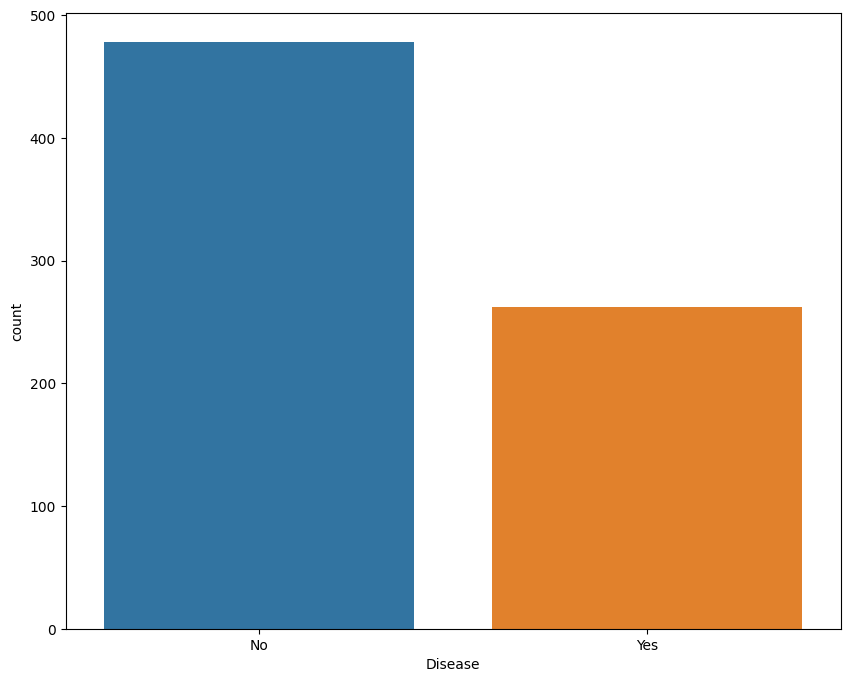

In [113]:
plt.figure(figsize=(10, 8))
sns.countplot(data=preprocessed_data, x='Disease')
plt.savefig('figs/disease_plot.png', format='png', dpi=300)

## Time to show the EDA:

#### Let's see the distribution of the 'Reason for absence' column
- we can assert that the most frequent reasons 
for absence are related to medical consultations (23), dental consultations (28), 
and physiotherapy (27). On the other hand, the most frequent reasons for absence 
encoded in the ICD encoding are related to diseases of the musculoskeletal system 
and connective tissue (13) and injury, poisoning, and certain other consequences of 
external causes (19).

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
Name: Reason for absence, dtype: int64


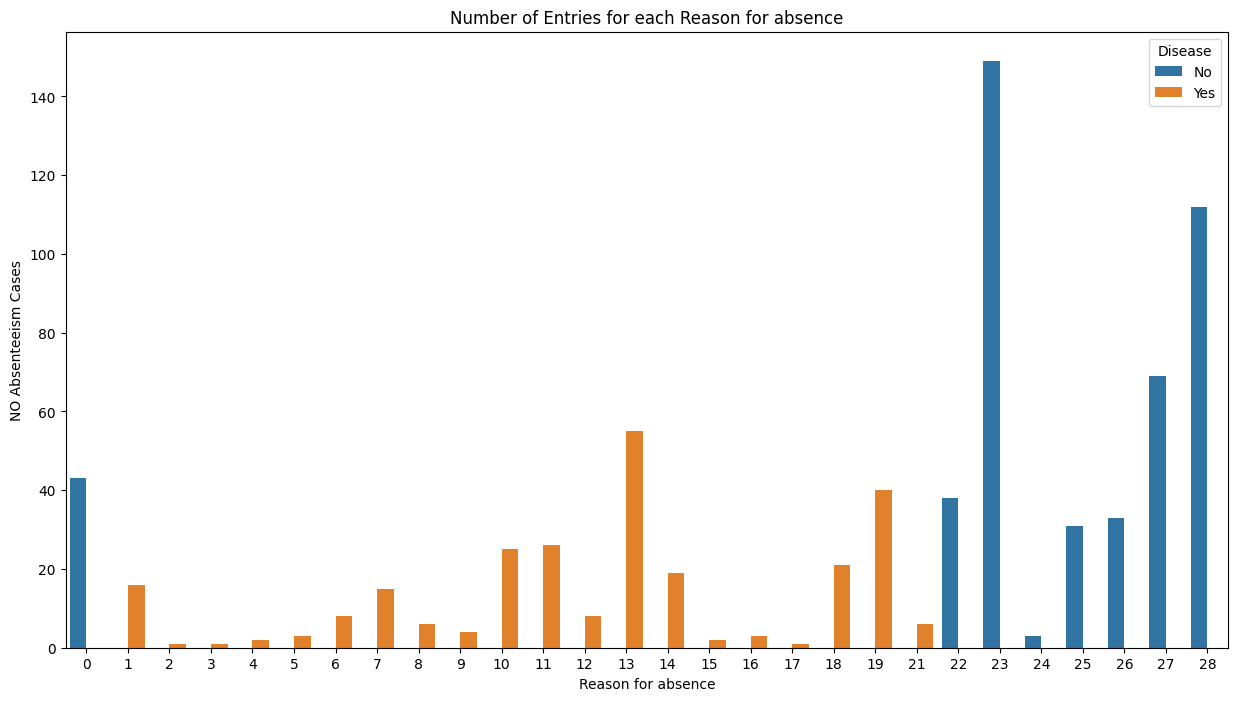

In [114]:
# What are the top 10 Reasons common?
print(preprocessed_data['Reason for absence'].value_counts()[:10])

plt.figure(figsize=(15, 8))
sns.countplot(data=preprocessed_data, x='Reason for absence', hue='Disease')
plt.ylabel('NO Absenteeism Cases')
plt.title('Number of Entries for each Reason for absence')
plt.savefig('figs/Reason for absence Distribution.png', format='png', dpi=300)

### Which month tend to have more events
- We can simply see that the plot tells March, February and October are the top three respectively

March        87
February     72
October      71
July         67
May          64
November     63
August       54
June         54
September    53
April        53
January      50
December     49
Unknown       3
Name: Month of absence, dtype: int64


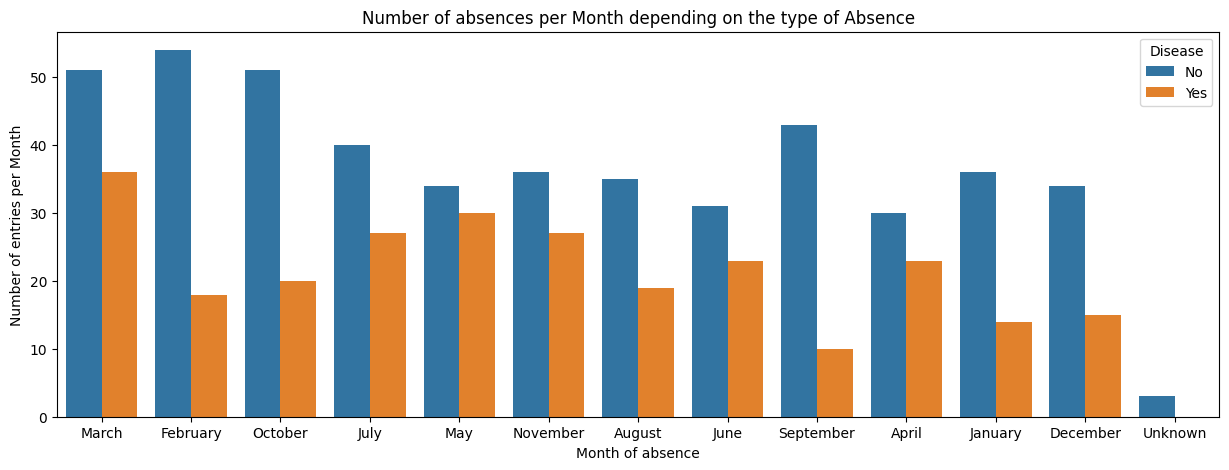

In [115]:
# How many entries per each month?
print(preprocessed_data['Month of absence'].value_counts())

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=preprocessed_data, x='Month of absence',\
                        hue='Disease',\
                        order = preprocessed_data['Month of absence'].value_counts().index)
ax.set_ylabel("Number of entries per Month")
plt.title('Number of absences per Month depending on the type of Absence')
plt.savefig('figs/value_counts_month.png', format='png')

### Which days tend to have more events

- Monday tend to be the highest day for absence but there is no significant differences between the days.

Monday       161
Wednesday    156
Tuesday      154
Friday       144
Thursday     125
Name: Day of the week, dtype: int64


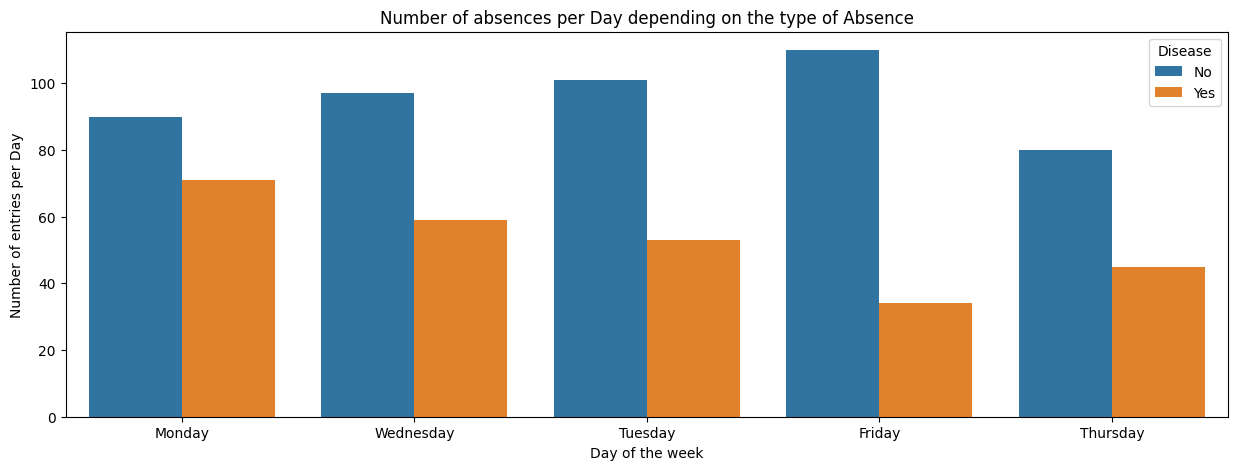

In [116]:
# How many entries per each day?
print(preprocessed_data['Day of the week'].value_counts())

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=preprocessed_data, x='Day of the week',\
                        hue='Disease',\
                        order = preprocessed_data['Day of the week'].value_counts().index)
ax.set_ylabel("Number of entries per Day")
plt.title('Number of absences per Day depending on the type of Absence')

plt.savefig('figs/value_counts_day.png', format='png')

### Which season tend to have  more events

- Winter is the month with the highest number of entries but also here there is no significant Differences between the Seasons

Winter    195
Summer    192
Fall      183
Spring    170
Name: Seasons, dtype: int64


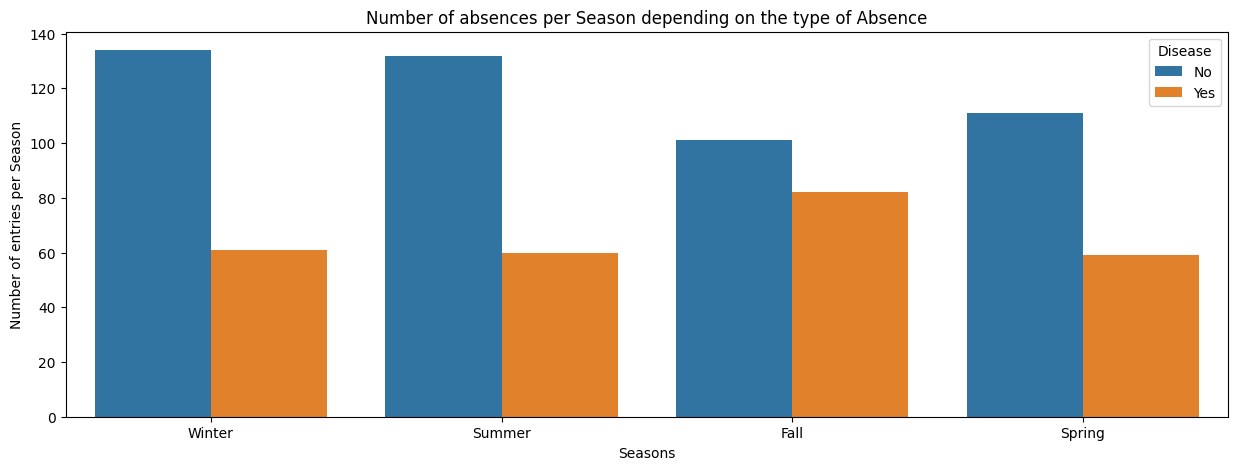

In [117]:
# How many entries per each Season?
print(preprocessed_data['Seasons'].value_counts())

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=preprocessed_data, x='Seasons',\
                        hue='Disease',\
                        order = preprocessed_data['Seasons'].value_counts().index)
ax.set_ylabel("Number of entries per Season")
plt.title('Number of absences per Season depending on the type of Absence')

plt.savefig('figs/value_counts_season.png', format='png')

### The Disciplinary failure on the Reason for absence.

- There is only 40 entries for the 'No' type of disciplinary failure and all of them belong to the 0 Reason for absence.

0    40
Name: Reason for absence, dtype: int64


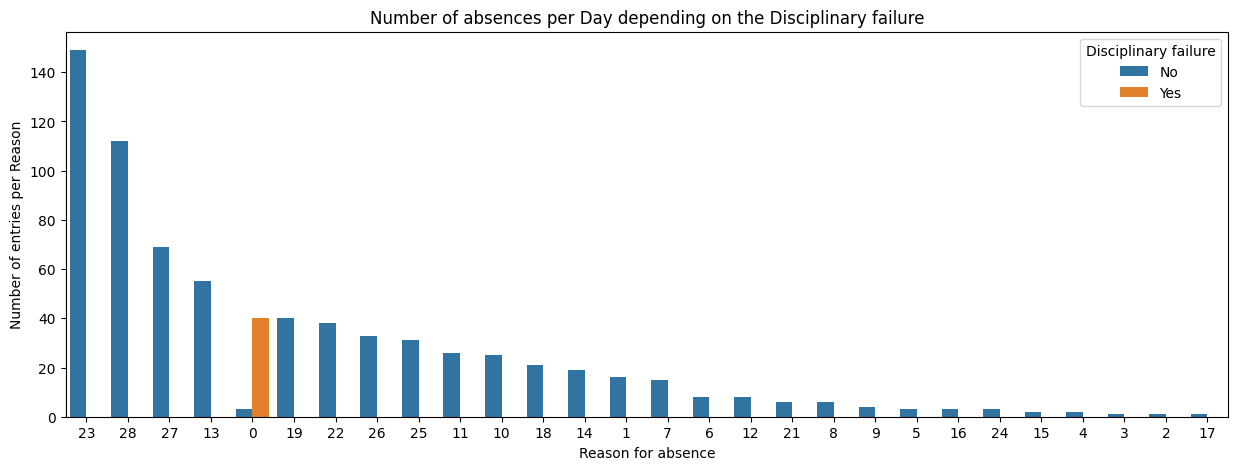

In [118]:
print(preprocessed_data[preprocessed_data['Disciplinary failure']=='Yes']['Reason for absence'].value_counts())

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=preprocessed_data, x='Reason for absence',\
                        hue='Disciplinary failure',\
                        order = preprocessed_data['Reason for absence'].value_counts().index)
ax.set_ylabel("Number of entries per Reason")
plt.title('Number of absences per Day depending on the Disciplinary failure')

plt.savefig('figs/Disciplinary_failure_counts.png', format='png')

###  Education Counts
- There is a huge Number of entries in the high school level. So this could be a relationship there.

high_school     611
postgraduate     79
graduate         46
master_phd        4
Name: Education, dtype: int64


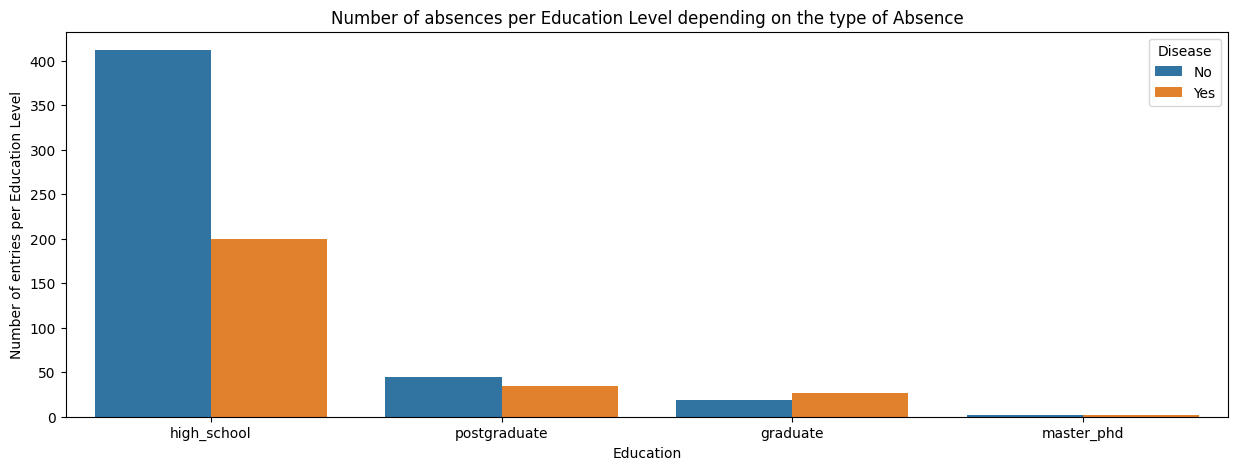

In [119]:
# How many entries per each education level?
print(preprocessed_data['Education'].value_counts())

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=preprocessed_data, x='Education',\
                        hue='Disease',\
                        order = preprocessed_data['Education'].value_counts().index)
ax.set_ylabel("Number of entries per Education Level")
plt.title('Number of absences per Education Level depending on the type of Absence')

plt.savefig('figs/Educaion_counts.png', format='png')

### How the number of Sons affects the NO_absence
- It seems that having more children tend to help peaple focus more on their work

0    298
1    229
2    156
4     42
3     15
Name: Son, dtype: int64


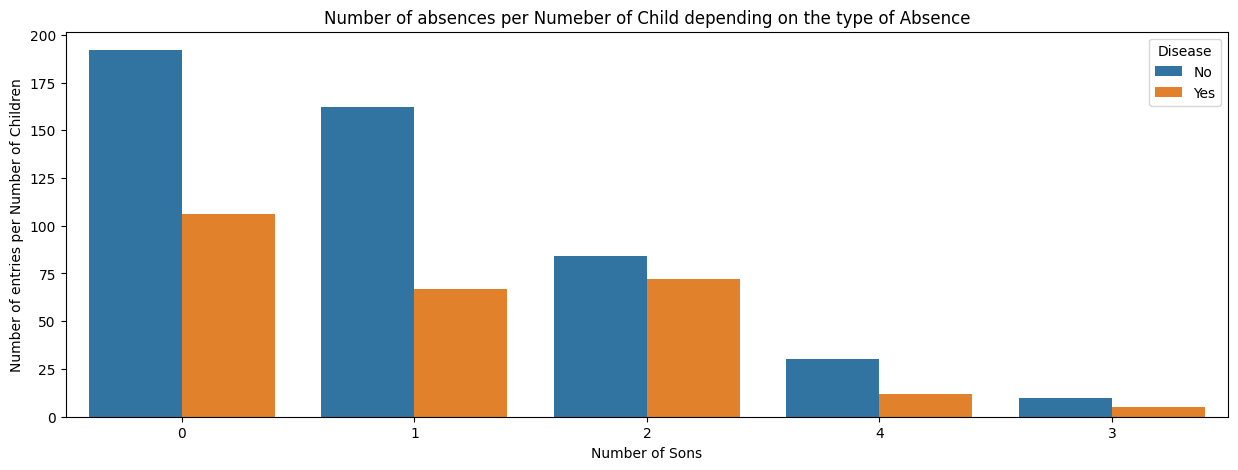

In [120]:
# How many entries in each number of children?
print(preprocessed_data['Son'].value_counts())

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=preprocessed_data, x='Son',\
                        hue='Disease',\
                        order = preprocessed_data['Son'].value_counts().index)
ax.set_ylabel("Number of entries per Number of Children")
plt.xlabel('Number of Sons')
plt.title('Number of absences per Numeber of Child depending on the type of Absence')

plt.savefig('figs/Children_counts.png', format='png')

#  We will use conditional probabilities to see how being a Social Smoker or Social Drinker affects the reasons for absence.

### How the 'Social drinker' affects the Reasons for absence
- Sounds that drinkers tend to absence alot more than the non-drinkers except for reason 23, 25 reason.

Yes    0.567568
No     0.432432
Name: Social drinker, dtype: float64


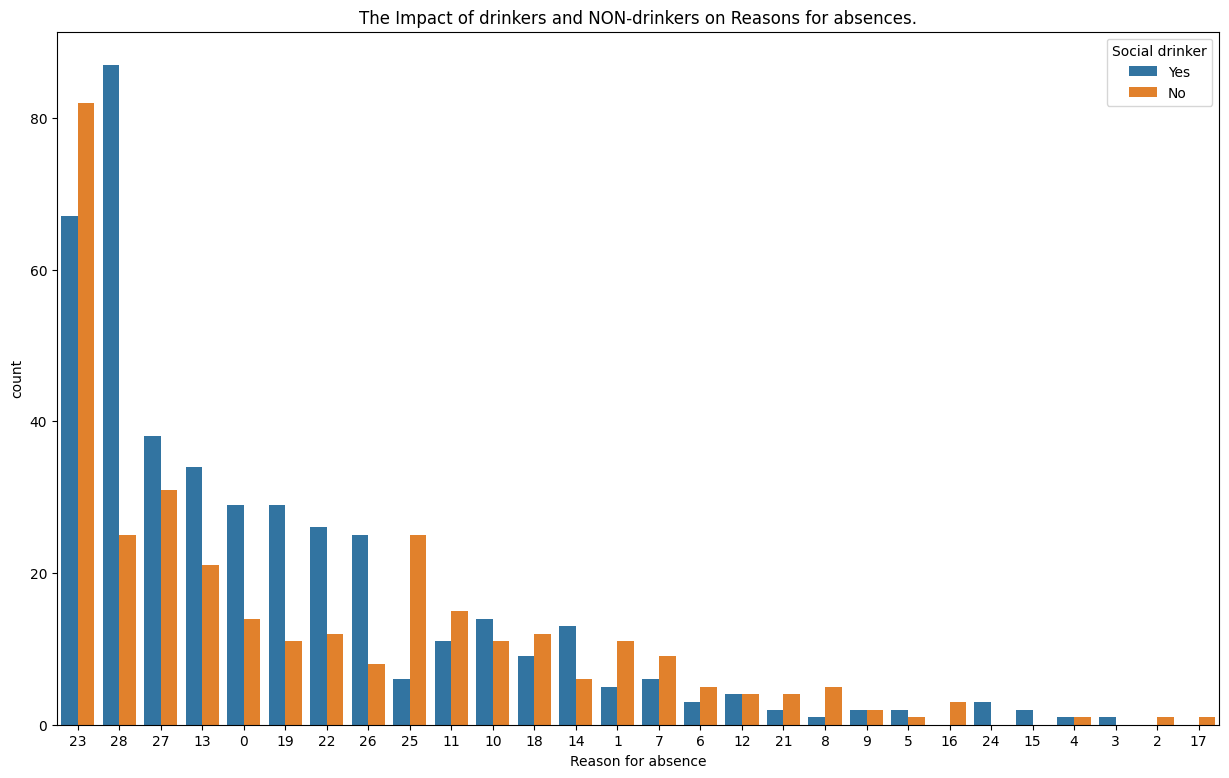

In [121]:
print(preprocessed_data['Social drinker'].value_counts(normalize=True))

plt.figure(figsize=(15, 9))
sns.countplot(data=preprocessed_data, x="Reason for absence", \
              hue="Social drinker",\
              order=preprocessed_data['Reason for absence'].value_counts().index)
plt.title('The Impact of drinkers and NON-drinkers on Reasons for absences.')

plt.savefig('figs/social_drinker_counts.png', format='png')

### Social Smoker Counts
- Sounds that being a social smoker doesn't have that kind impact on the reasons for absence.

No     0.927027
Yes    0.072973
Name: Social smoker, dtype: float64


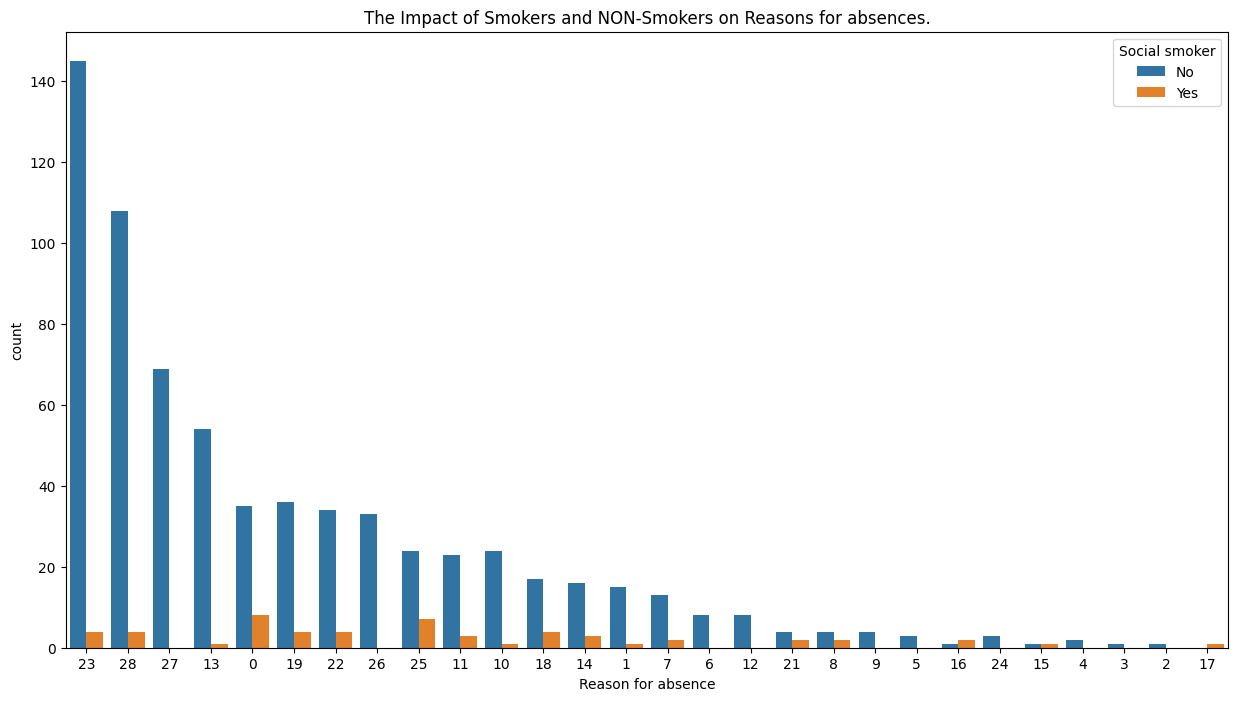

In [122]:
print(preprocessed_data['Social smoker'].value_counts(normalize=True))

plt.figure(figsize=(15, 8))
sns.countplot(data=preprocessed_data, x="Reason for absence", \
              hue="Social smoker",\
              order=preprocessed_data['Reason for absence'].value_counts().index)
plt.title('The Impact of Smokers and NON-Smokers on Reasons for absences.')

plt.savefig('figs/social_smoker_counts.png', format='png')

## Now it's time for conditional probabilities.
- Conditional probability is a measure that tells us the probability of an event's 
occurrence, assuming that another event has occurred.

- by using the definition of conditional probability, we could address 
questions such as, "What is the probability of a reason for absence being related to 
laboratory examinations, assuming that an employee is a social drinker?" In other 
words, if we denote the "employee is absent for laboratory examinations" event 
with A, and the "employee is a social drinker" event with B, the probability of the 
"employee is absent due to laboratory examination reasons, given that employee is a 
social drinker"

In [123]:
# compute probabilities of being a drinker and smoker
drinker_prob = preprocessed_data["Social drinker"].value_counts(normalize=True)["Yes"]
smoker_prob = preprocessed_data["Social smoker"].value_counts(normalize=True)["Yes"]

print(f"P(social drinker) = {drinker_prob:.3f} | P(social smoker) = {smoker_prob:.3f}")

#create mask for social drinkers/smokers
drinker_mask = preprocessed_data["Social drinker"] == "Yes"
smoker_mask = preprocessed_data["Social smoker"] == "Yes"

total_entries = preprocessed_data.shape[0]

absence_drinker_prob = preprocessed_data["Reason for absence"][drinker_mask].value_counts() / total_entries
absence_smoker_prob = preprocessed_data["Reason for absence"][smoker_mask].value_counts() / total_entries

P(social drinker) = 0.568 | P(social smoker) = 0.073


<Figure size 640x480 with 0 Axes>

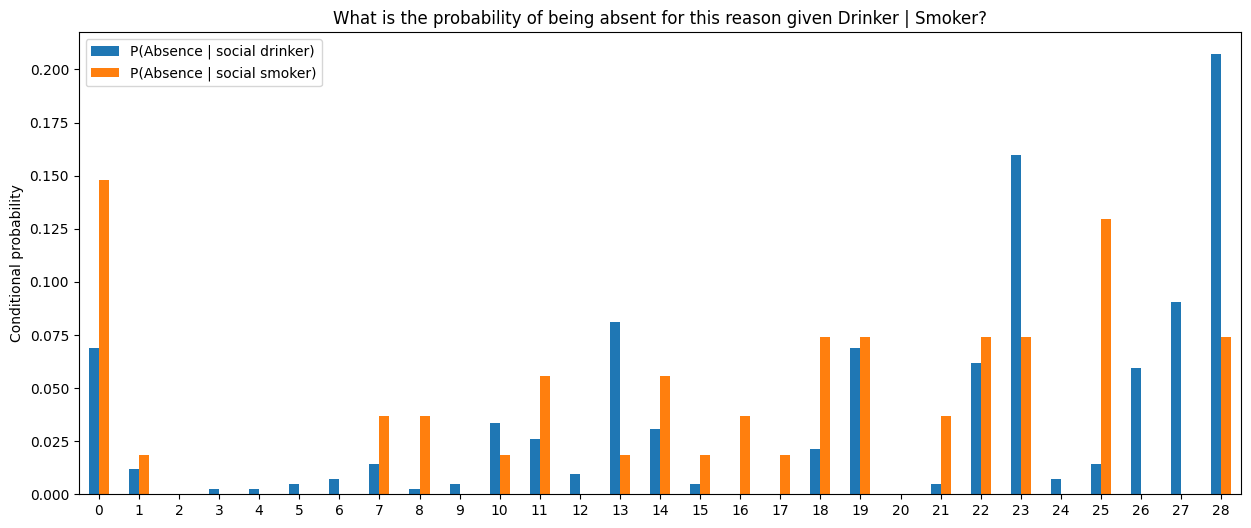

In [124]:
# compute conditional probabilities
cond_prob = pd.DataFrame(index=range(0,29))
cond_prob["P(Absence | social drinker)"] = absence_drinker_prob\
                                           /drinker_prob
cond_prob["P(Absence | social smoker)"] = absence_smoker_prob\
                                          /smoker_prob
# plot probabilities
plt.figure()
ax = cond_prob.plot.bar(figsize=(15,6), rot=0)
ax.set_ylabel("Conditional probability")
plt.title('What is the probability of being absent for this reason given Drinker | Smoker?')
plt.savefig('figs/conditional_probabilities.png', \
            format='png', dpi=300)

- As we can observe from the previous plot, the highest reason for absence for 
drinkers is dental consultations (28), followed by medical consultations (23). 
Smokers' absences, however, are mostly due to unknown reasons (0) and 
laboratory examinations (25).

### Bayesian Theorem
- As we go through the Probability of Being a Drinker/Smoker, Conditioned to Absence Reason we will use the Bayesian Theorem to get that probability.

In [125]:
# compute reason for absence probabilities
absence_prob = preprocessed_data["Reason for absence"]\
               .value_counts(normalize=True)

<Figure size 640x480 with 0 Axes>

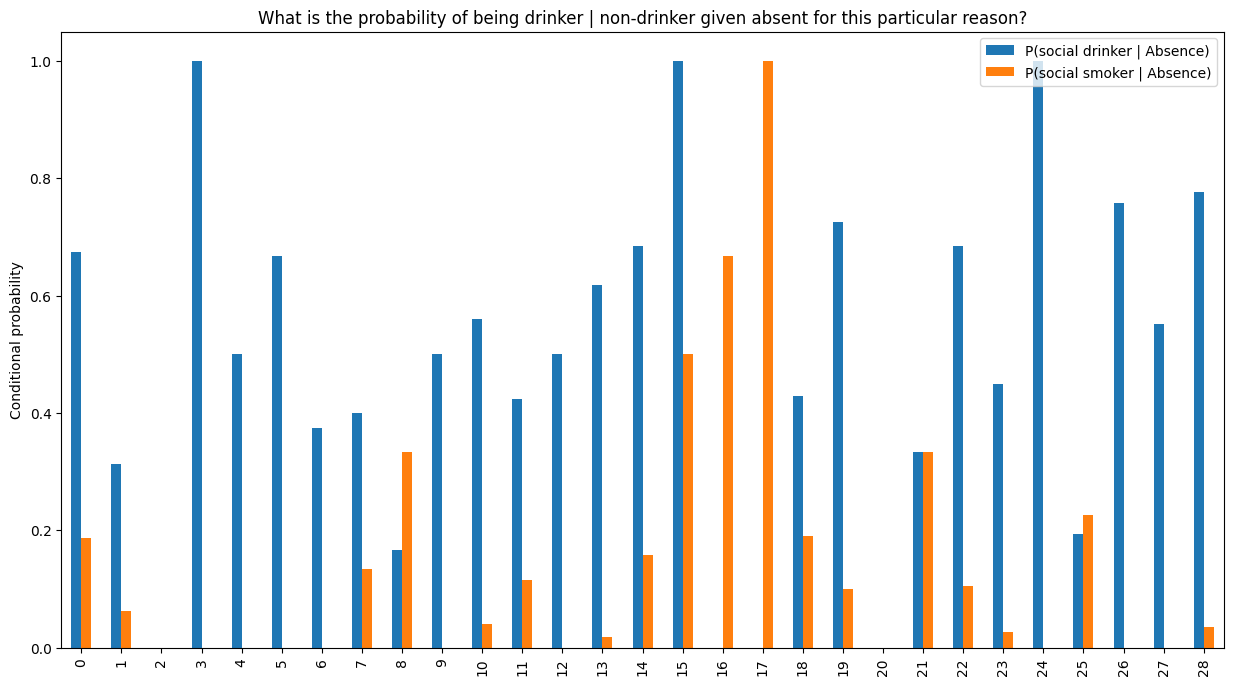

In [126]:
# compute conditional probabilities for drinker/smoker
cond_prob_drinker_smoker = pd.DataFrame(index=range(0,29))

cond_prob_drinker_smoker["P(social drinker | Absence)"] = \
                    cond_prob["P(Absence | social drinker)"] * drinker_prob / absence_prob

cond_prob_drinker_smoker["P(social smoker | Absence)"] = \
                    cond_prob["P(Absence | social smoker)"] * smoker_prob / absence_prob

plt.figure()
ax = cond_prob_drinker_smoker.plot.bar(figsize=(15,8))
ax.set_ylabel("Conditional probability")
plt.title('What is the probability of being drinker | non-drinker given absent for this particular reason?')

plt.savefig('figs/conditional_probabilities_drinker_smoker.png', \
            format='png', dpi=300)

- As you can see from the resulting plot, the conditional probabilities of being 
a social drinker/smoker are quite high, once an absence with a certain reason 
occurs. This is due to the fact that the number of entries is very small; as such, if 
all the registered employees who were absent for a certain reason are smokers, 
the probability of being a smoker, once that reason has been registered, will be 
equal to one (based on the available data).

## the distribution of the hours of absenteeism based on the two classes (being a social drinker/smoker versus not being).
- there is no substantial difference in the 
distribution of absenteeism hours in drinkers and smokers. 


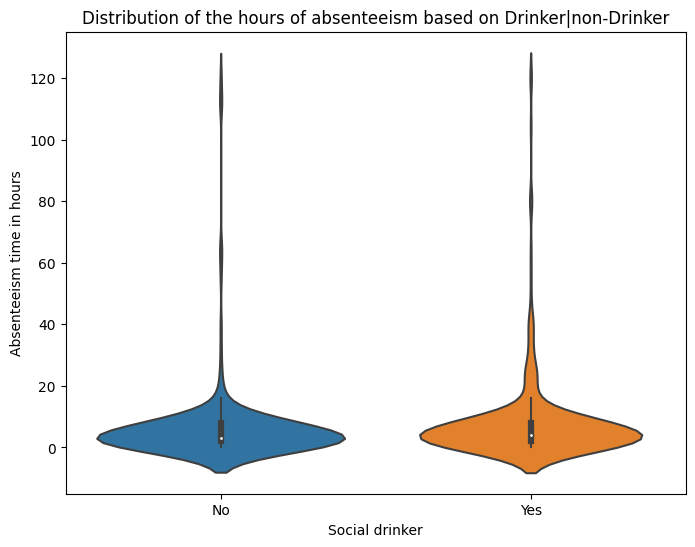

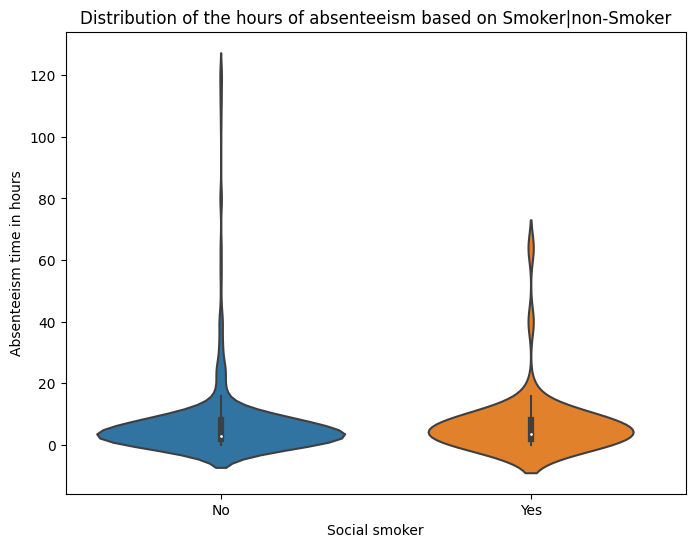

In [127]:
# create violin plots of the absenteeism time in hours
plt.figure(figsize=(8,6))
sns.violinplot(x="Social drinker", y="Absenteeism time in hours", \
               data=preprocessed_data, order=["No", "Yes"])
plt.title('Distribution of the hours of absenteeism based on Drinker|non-Drinker')

plt.savefig('figs/drinkers_hour_distribution.png', \
            format='png', dpi=300)


plt.figure(figsize=(8,6))

sns.violinplot(x="Social smoker", y="Absenteeism time in hours", \
               data=preprocessed_data, order=["No", "Yes"])
plt.title('Distribution of the hours of absenteeism based on Smoker|non-Smoker')
plt.savefig('figs/smokers_hour_distribution.png', \
            format='png', dpi=300)

- To assess this statement in a rigorous statistical way, perform hypothesis testing 
on the absenteeism hours (with a null hypothesis stating that the average 
absenteeism time in hours is the same for drinkers and non-drinkers):

In [128]:
from scipy.stats import ttest_ind
hours_col = "Absenteeism time in hours"
# test mean absenteeism time for drinkers
drinkers_mask = preprocessed_data["Social drinker"] == "Yes"
hours_drinkers = preprocessed_data.loc[drinker_mask, hours_col]
hours_non_drinkers = preprocessed_data\
                     .loc[~drinker_mask, hours_col]
drinkers_test = ttest_ind(hours_drinkers, hours_non_drinkers)
print(f"Statistic value: {drinkers_test[0]}, \
p-value: {drinkers_test[1]}")

Statistic value: 1.7713833295243993, p-value: 0.07690961828294651


- Perform the same test on the social smokers:

In [129]:
# test mean absenteeism time for smokers
smokers_mask = preprocessed_data["Social smoker"] == "Yes"
hours_smokers = preprocessed_data.loc[smokers_mask, hours_col]
hours_non_smokers = preprocessed_data\
                    .loc[~smokers_mask, hours_col]
smokers_test = ttest_ind(hours_smokers, hours_non_smokers)
print(f"Statistic value: {smokers_test[0]}, \
p-value: {smokers_test[1]}")

Statistic value: -0.24277795417700243, p-value: 0.8082448720154971


As you can see, the p-value of both tests is above the critical value of 0.05, which 
means that you cannot reject the null hypothesis. In other words, you cannot 
say that there is a statistically significant difference in the absenteeism hours 
between drinkers (and smokers) and non-drinkers (and non-smokers).

### Perform a Kolmogorov-Smirnov test to assess the difference in the distributions of two samples:
-The p-value for the drinkers dataset is lower than the critical 0.05, which is strong 
evidence against the null hypothesis of the two distributions being equal. On the 
other hand, as the p-value for the smokers dataset is higher than 0.05, you cannot 
reject the null hypothesis.

In [130]:
# perform Kolmogorov-Smirnov test for comparing the distributions
from scipy.stats import ks_2samp
ks_drinkers = ks_2samp(hours_drinkers, hours_non_drinkers)
ks_smokers = ks_2samp(hours_smokers, hours_non_smokers)

print(f"Drinkers comparison: statistics={ks_drinkers[0]:.3f}, \
pvalue={ks_drinkers[1]:.3f}")
print(f"Smokers comparison: statistics={ks_smokers[0]:.3f}, \
pvalue={ks_smokers[1]:.3f}")

Drinkers comparison: statistics=0.135, pvalue=0.002
Smokers comparison: statistics=0.104, pvalue=0.607


### Pet Counts
- It seems that having no Pets tend to absent a lot more.

0    460
1    138
2     96
4     32
8      8
5      6
Name: Pet, dtype: int64


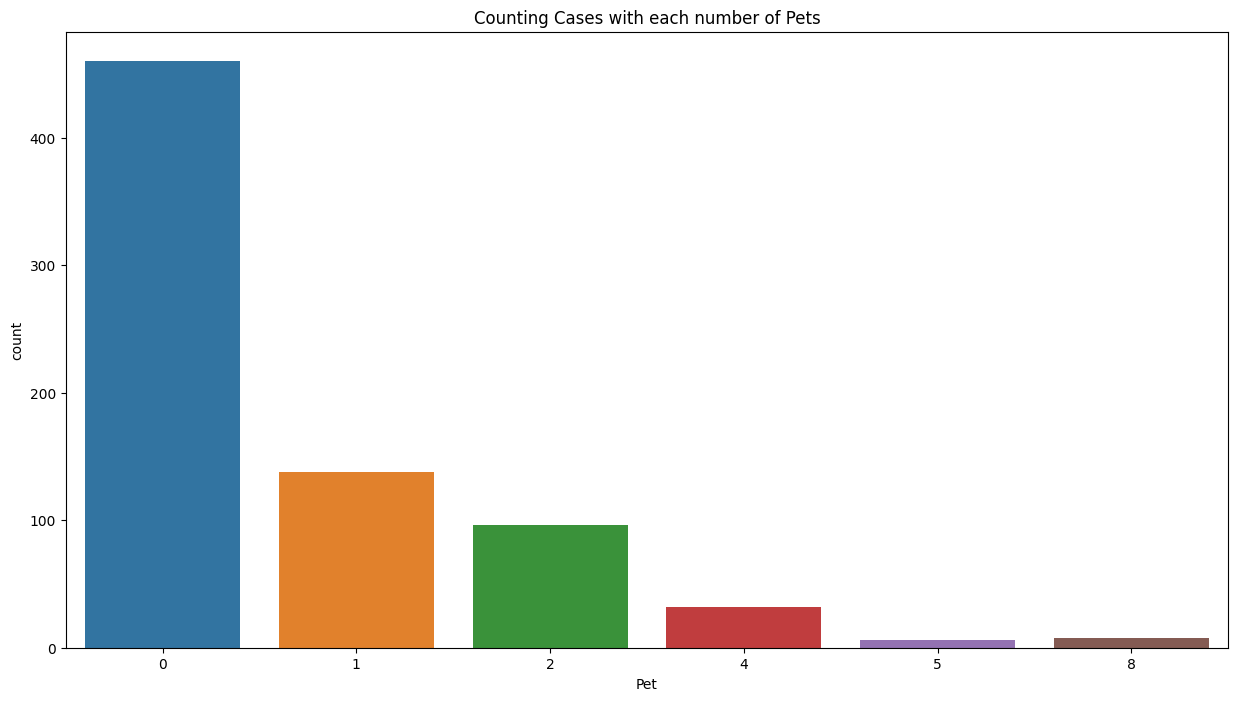

In [131]:
print(preprocessed_data['Pet'].value_counts())

plt.figure(figsize=(15, 8))
sns.countplot(data=preprocessed_data, x='Pet')
plt.title('Counting Cases with each number of Pets')

plt.savefig('figs/Pet_counts.png', format='png')

### Body Mass Index
BMI is a universal way to classify people as underweight, healthy weight, 
overweight, and obese, based on tissue mass (muscle, fat, and bone) and height. 
- We need to categorize the body mass index values as we can't run the our analysis on the actual values this way.
- There is no accurate pattern for the body mass index.

We can see that no entries for the underweight category are present, with the 
data being almost uniformly distributed among the remaining three categories. Of 
course, this is an alarming indicator, as more than 60% of the employees are either 
overweight or obese.

Normal Weight    0.356757
Obese            0.329730
Overweight       0.313514
Name: BMI category, dtype: float64


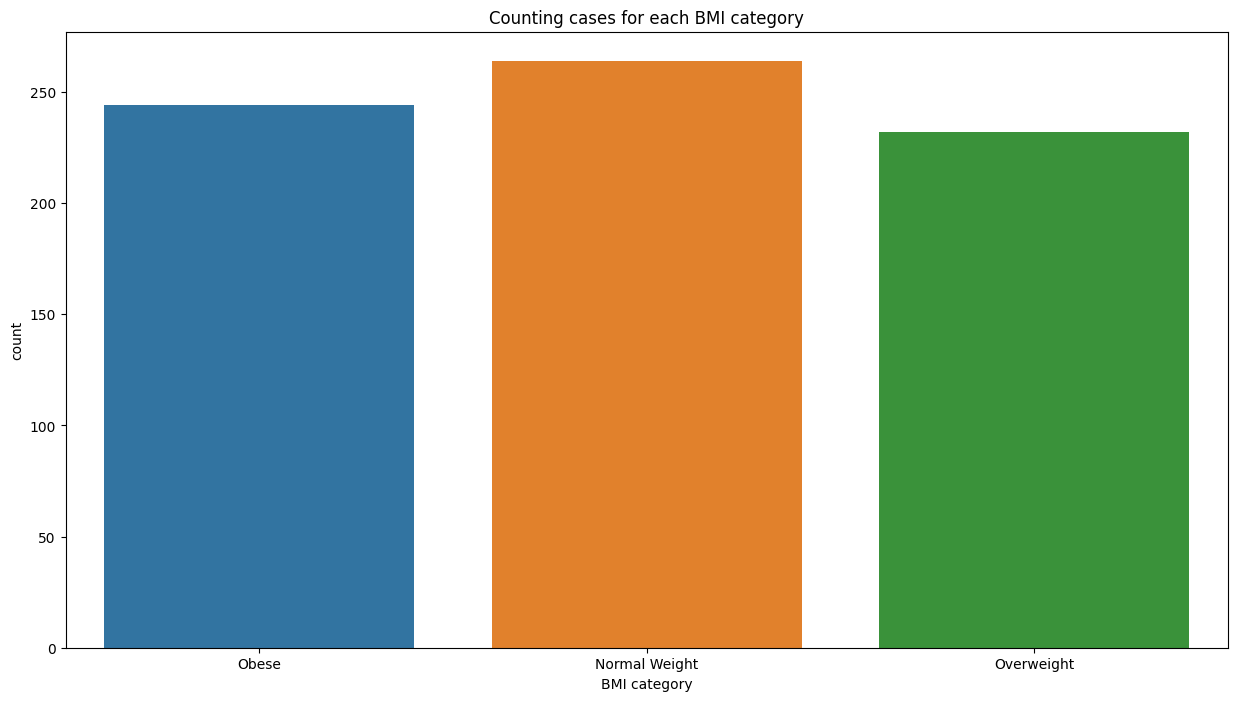

In [132]:
def bod_ms_ind(val):
    if val < 18.5:
        return 'Underweight'
    elif val > 18.5 and val < 25:
        return 'Normal Weight'
    elif val > 24.9 and val < 30:
        return 'Overweight'
    else:
        return 'Obese'

preprocessed_data['BMI category'] = preprocessed_data['Body mass index'].apply(bod_ms_ind)

print(preprocessed_data['BMI category'].value_counts(normalize=True))

plt.figure(figsize=(15, 8))
sns.countplot(data=preprocessed_data, x="BMI category")
plt.title('Counting cases for each BMI category')

plt.savefig('figs/Body_mass_index_counts.png', format='png')

#### Now, let's check how the different BMI categories are related to the reason for absence. More precisely, we would like to see how many employees there are based on their body mass index and their reason for absence. 
- Unfortunately, no clear pattern arises from the preceding plot. In other words, for 
each reason for absence, an (almost) equal number of employees with different body 
mass indexes are present.

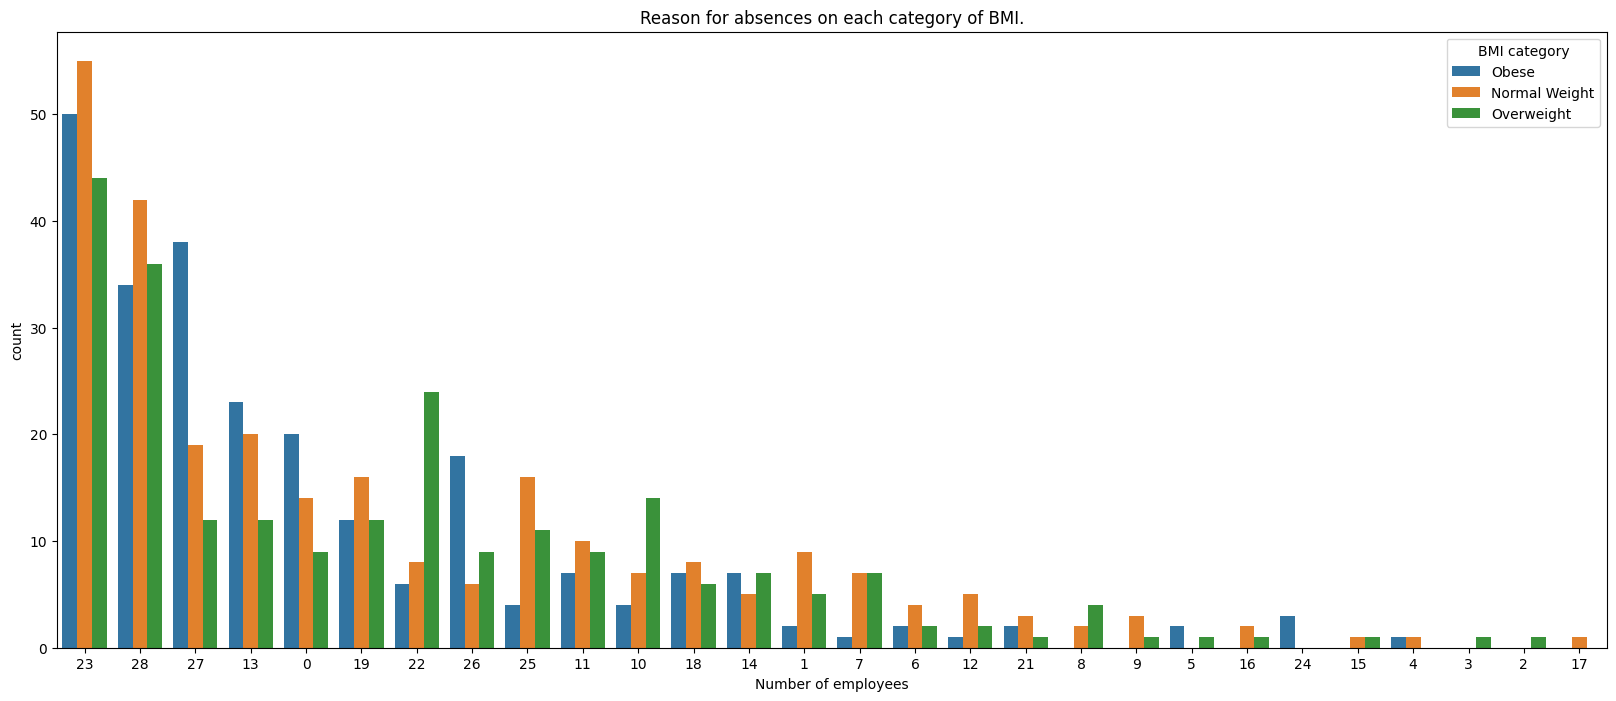

In [133]:
# plot BMI categories vs Reason for absence
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=preprocessed_data, \
                   x="Reason for absence", hue="BMI category",\
                    order=preprocessed_data['Reason for absence'].value_counts().index)
ax.set_xlabel("Number of employees")
ax.set_title('Reason for absences on each category of BMI.')

plt.savefig('figs/reasons_bmi.png', format='png', dpi=300)

#### We can also investigate the distribution of absence hours for the different BMI categories
- no evidence states that BMI and obesity levels influence the employees' absenteeism.

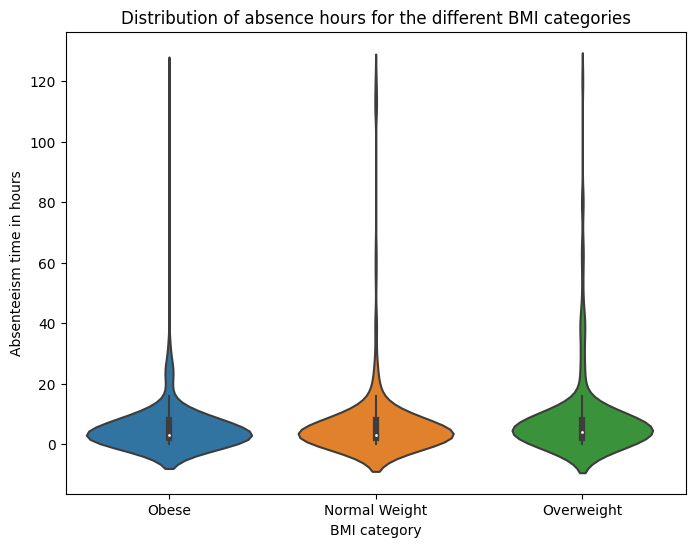

In [134]:
# plot distribution of absence time, based on BMI category
plt.figure(figsize=(8,6))
sns.violinplot(x="BMI category", \
               y="Absenteeism time in hours", \
               data=preprocessed_data)
plt.title('Distribution of absence hours for the different BMI categories')

plt.savefig('figs/bmi_hour_distribution.png', format='png')

## Age and Education Factors
- As we can observe from the resulting plot, no significant pattern occurs. Furthermore, 
the correlation coefficient is extremely small (0.066), and its p-value is above the 
threshold of 0.05, which is an additional indicator that no relationship is present 
between the Age and Absenteeism time in hours features. 


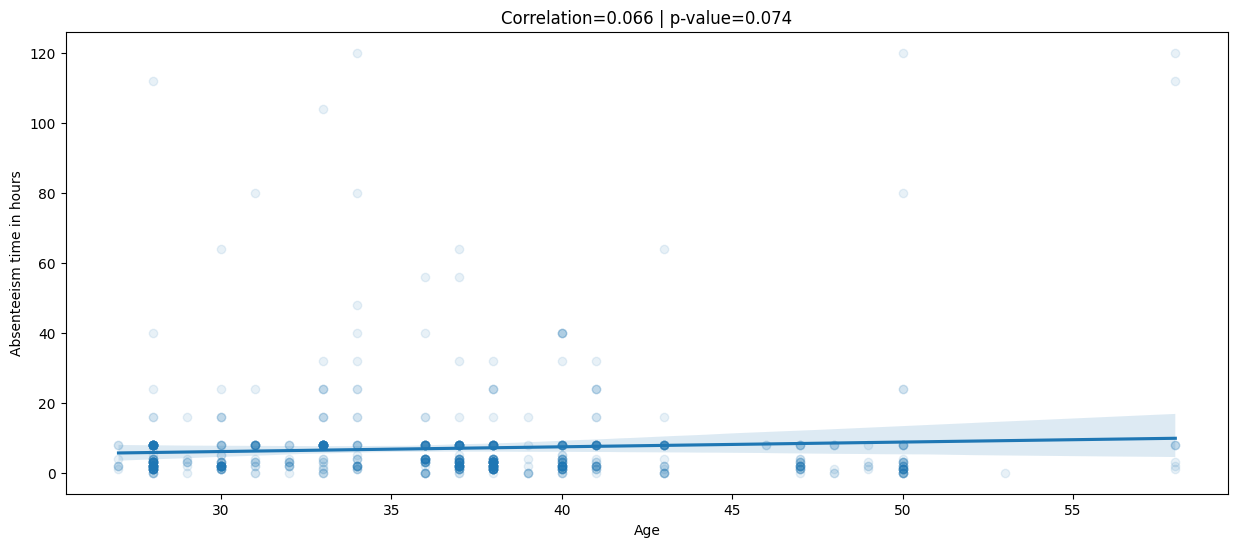

In [135]:
from scipy.stats import pearsonr
# compute Pearson's correlation coefficient and p-value
pearson_test = pearsonr(preprocessed_data["Age"], \
               preprocessed_data["Absenteeism time in hours"])
"""
create regression plot and add correlation coefficient in the title
"""
plt.figure(figsize=(15, 6))
ax = sns.regplot(x="Age", y="Absenteeism time in hours", \
                 data=preprocessed_data, scatter_kws={"alpha":0.1})

ax.set_title(f"Correlation={pearson_test[0]:.03f} \
| p-value={pearson_test[1]:.03f}")

plt.savefig('figs/correlation_age_hours.png', \
            format='png', dpi=300)


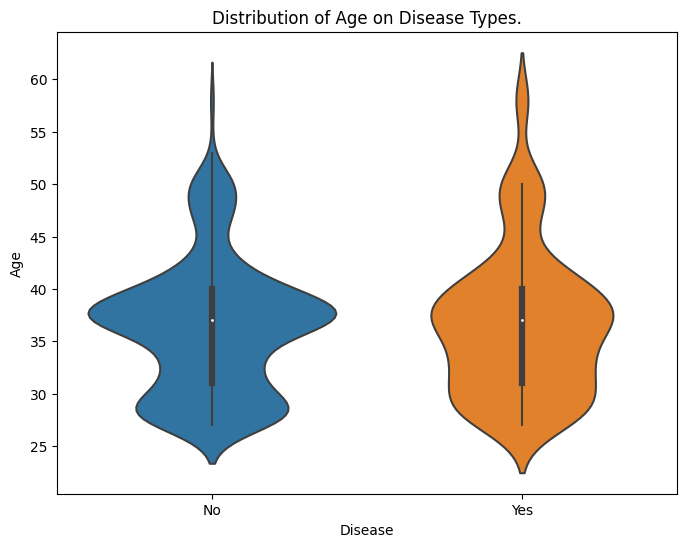

In [136]:
# create violin plot between the Age and Disease columns
plt.figure(figsize=(8,6))
sns.violinplot(x="Disease", y="Age", data=preprocessed_data)
plt.title('Distribution of Age on Disease Types.')
plt.savefig('figs/distribution_age_disease.png', \
            format='png', dpi=300)

- From the results of the two tests, you can conclude that there is no statistically 
significant difference between the two distributions. Thus, age is neither an 
indicator for the length of an absence nor for its type.

In [137]:
from scipy.stats import ttest_ind,ks_2samp
"""
get Age entries for employees with Disease == Yes and Disease == No
"""
disease_mask = preprocessed_data["Disease"] == "Yes"
disease_ages = preprocessed_data["Age"][disease_mask]
no_disease_ages = preprocessed_data["Age"][~disease_mask]

# perform hypothesis test for equality of means
test_res = ttest_ind(disease_ages, no_disease_ages)
print(f"Test for equality of means: \
statistic={test_res[0]:0.3f}, pvalue={test_res[1]:0.3f}")

# test equality of distributions via Kolmogorov-Smirnov test
ks_res = ks_2samp(disease_ages, no_disease_ages)
print(f"KS test for equality of distributions: \
statistic={ks_res[0]:0.3f}, pvalue={ks_res[1]:0.3f}")

Test for equality of means: statistic=0.630, pvalue=0.529
KS test for equality of distributions: statistic=0.057, pvalue=0.619


### the Impact of Education on Reason for Absence
- You can see that most of the employees in the data have a high school degree 
(82.6%), which means that the data is highly biased toward these employees.

- In light of the previously performed analysis, you can conclude that age has no impact 
on the employees' absenteeism.

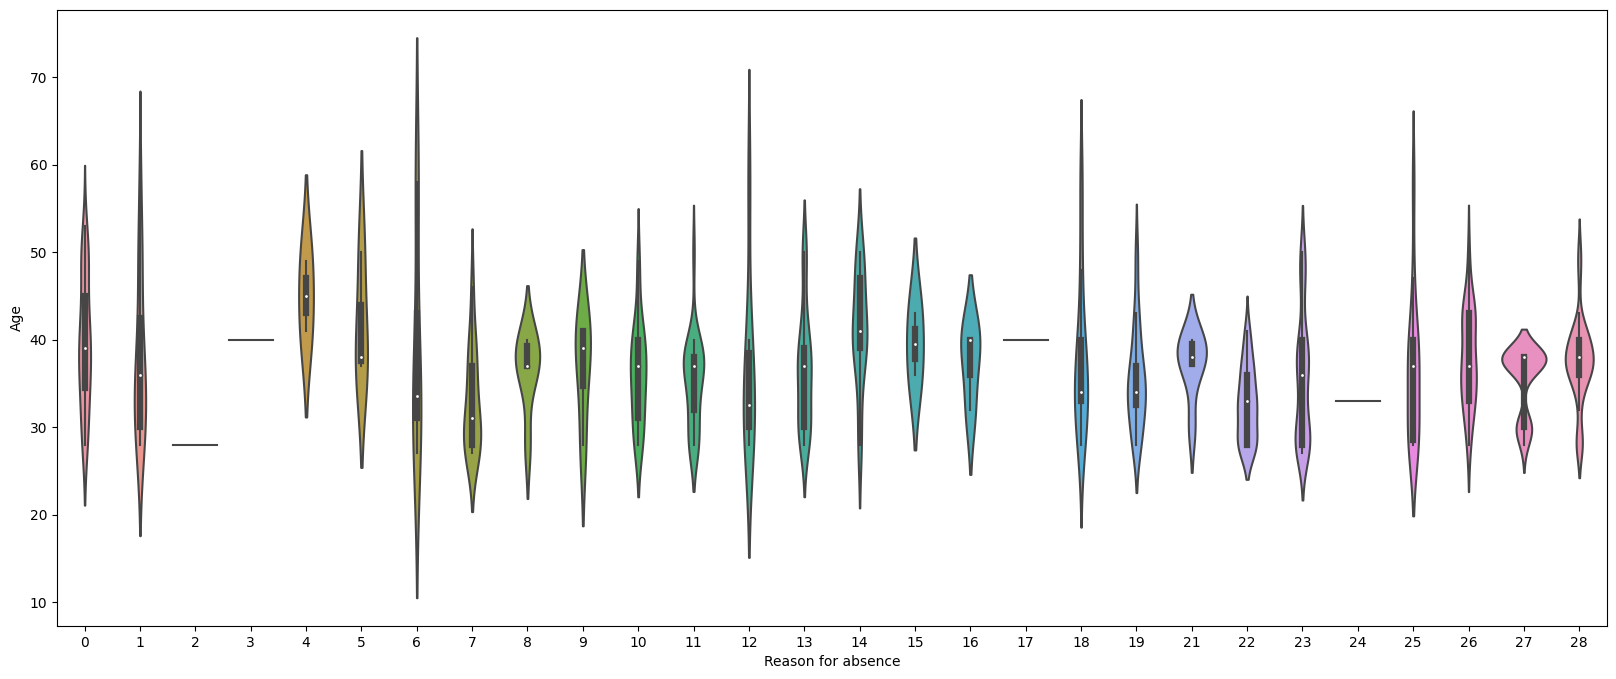

In [138]:
# violin plot of reason for absence vs age
plt.figure(figsize=(20,8))
sns.violinplot(x="Reason for absence", y="Age", \
 data=preprocessed_data)
plt.savefig('figs/distribution_age_reason.png', format='png')

- you can observe that most of the absences relate to 
employees with a high_school level of education. This is, of course, due to 
the fact that most of the employees only have a high school degree as observed. 

In [139]:
# compute percentage of employees per education level
education_types = ["high_school", "graduate", \
                   "postgraduate", "master_phd"]
counts = preprocessed_data["Education"].value_counts()

percentages = preprocessed_data["Education"]\
              .value_counts(normalize=True)

for educ_type in education_types:
    print(f"Education type: {educ_type:12s} \
| Counts : {counts[educ_type]:6.0f} \
| Percentage: {100*percentages[educ_type]:4.1f}")

Education type: high_school  | Counts :    611 | Percentage: 82.6
Education type: graduate     | Counts :     46 | Percentage:  6.2
Education type: postgraduate | Counts :     79 | Percentage: 10.7
Education type: master_phd   | Counts :      4 | Percentage:  0.5


- We can easily see how the high school degree have the widest distribution of them all. 

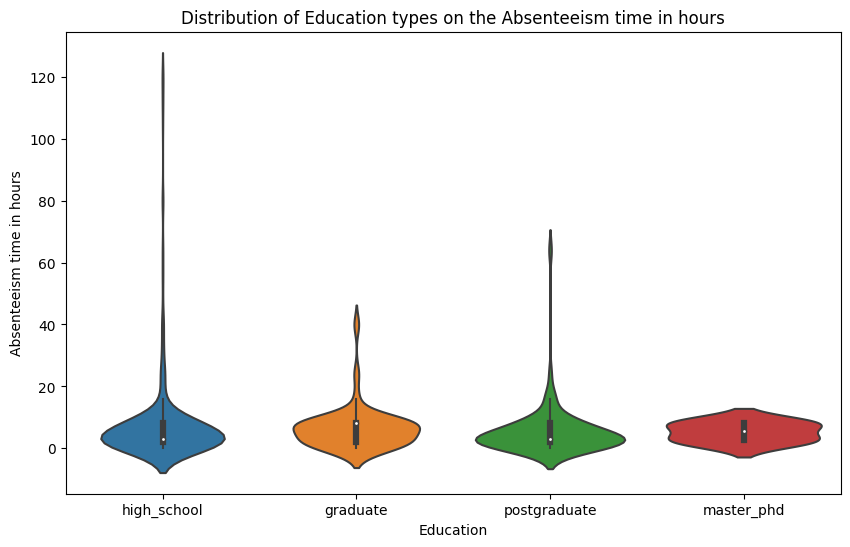

In [140]:
# distribution of absence hours, based on education level
plt.figure(figsize=(10,6))
sns.violinplot(x="Education", y="Absenteeism time in hours",\
               data=preprocessed_data, \
               order=["high_school", "graduate", \
                      "postgraduate", "master_phd"])
plt.title('Distribution of Education types on the Absenteeism time in hours')
plt.savefig('figs/Distribution_education_hours.png', format='png')

- You can see that both the mean and standard deviation of the hours of absence 
are decreasing, meaning that highly educated employees tend to have shorter 
absences.

In [141]:
# compute mean and standard deviation of absence hours
education_types = ["high_school", "graduate", \
                   "postgraduate", "master_phd"]
for educ_type in education_types:
    mask = preprocessed_data["Education"] == educ_type
    hours = preprocessed_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Education type: {educ_type:12s} | Mean : {mean:.03f} \
| Stddev: {stddev:.03f}")

Education type: high_school  | Mean : 7.190 | Stddev: 14.259
Education type: graduate     | Mean : 6.391 | Stddev: 6.754
Education type: postgraduate | Mean : 5.266 | Stddev: 7.963
Education type: master_phd   | Mean : 5.250 | Stddev: 3.202


- plotting the number of entries for each type of education.

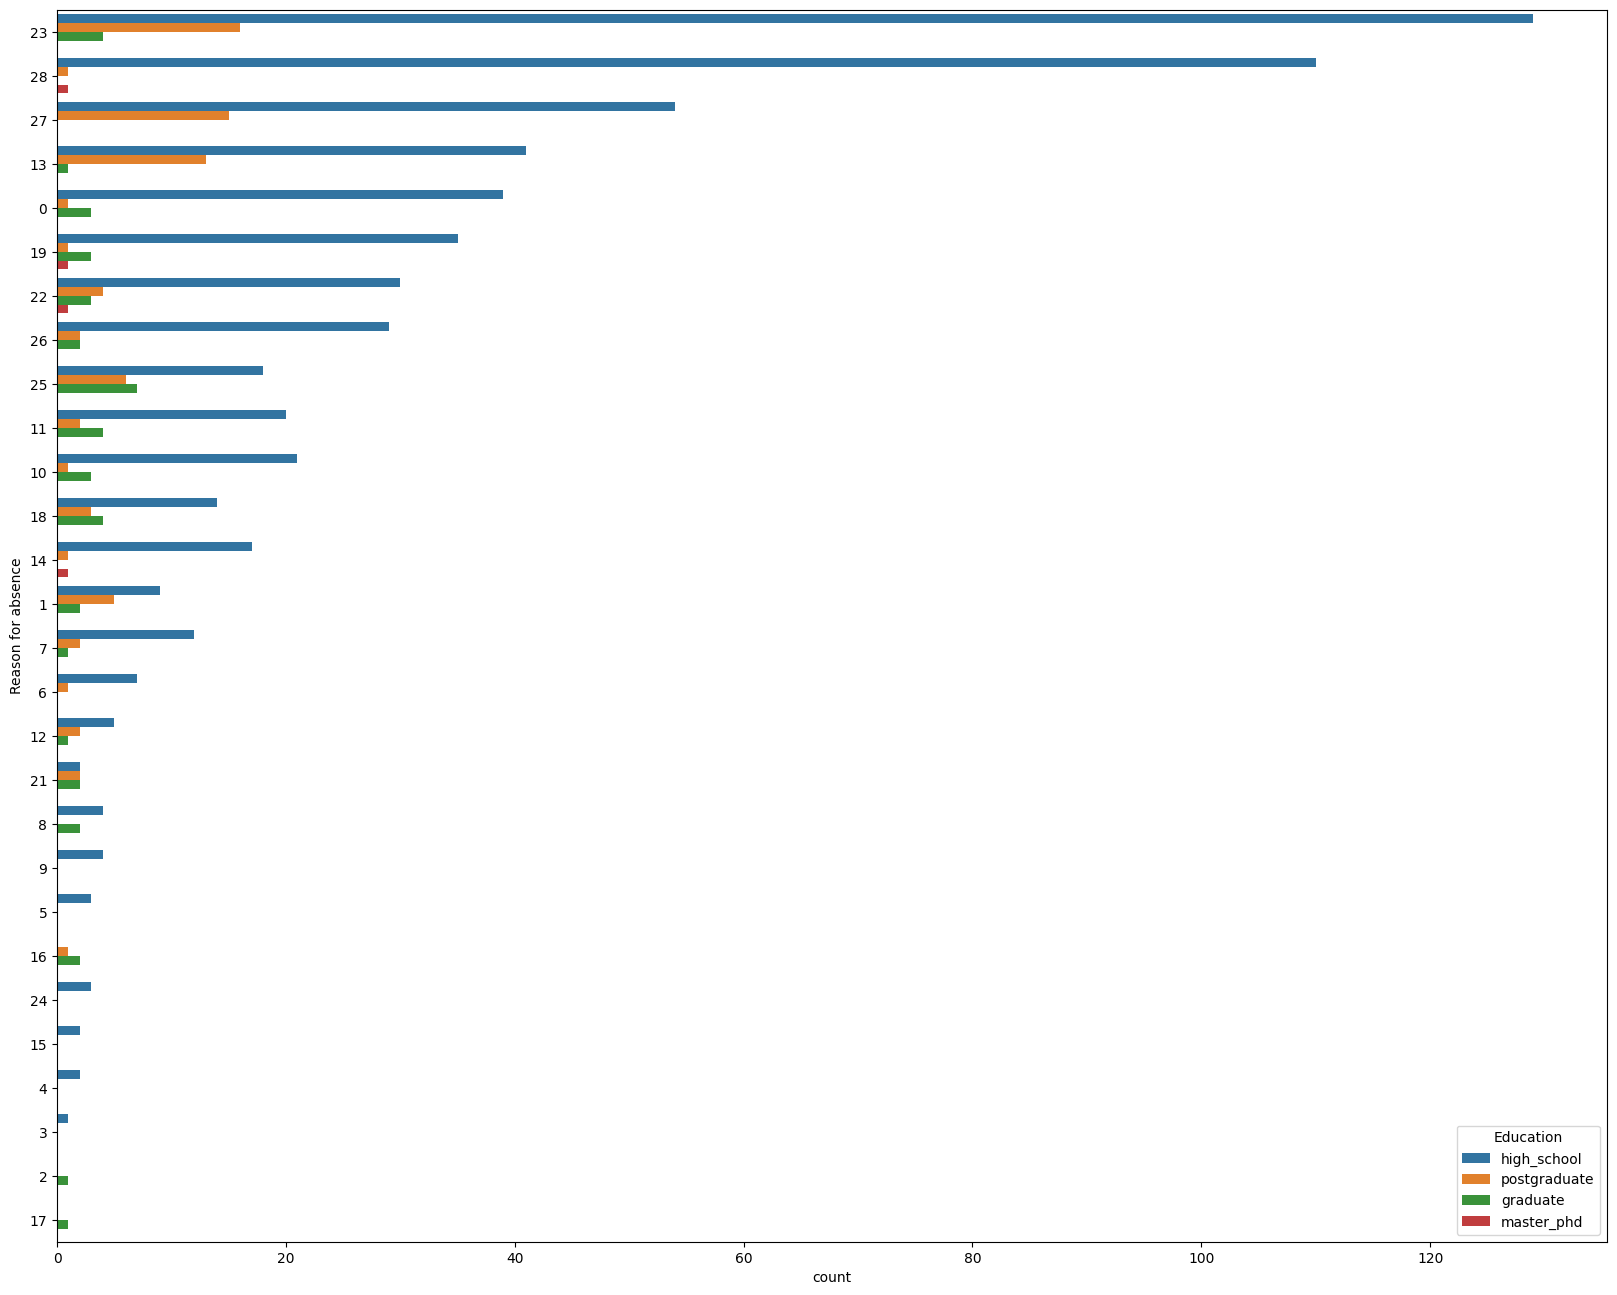

In [142]:
# plot reason for absence, based on education level
plt.figure(figsize=(20, 16))
sns.countplot(data=preprocessed_data, y="Reason for absence",\
              hue="Education", \
              order=preprocessed_data['Reason for absence'].value_counts().index)
plt.savefig('figs/counts_education_reason.png', format='png')

### Transportation Costs and Distance to Work Factors
- let's start our analysis by plotting the previously mentioned columns 
(Distance from Residence to Work and Transportation expense) 
against the Absenteeism time in hours column

<Figure size 1000x600 with 0 Axes>

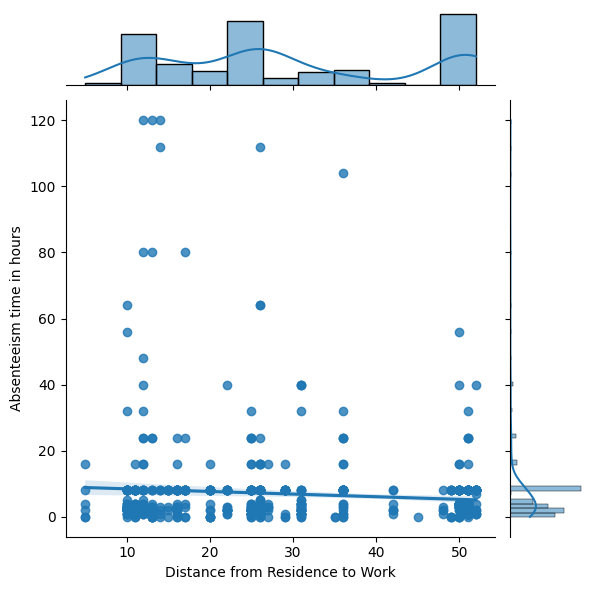

<Figure size 1000x600 with 0 Axes>

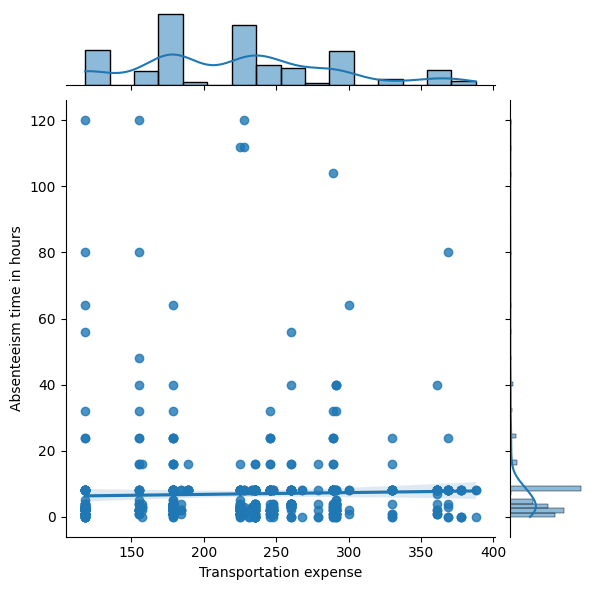

In [143]:
# plot transportation costs and distance to work against hours
plt.figure(figsize=(10, 6))
sns.jointplot(x="Distance from Residence to Work", \
              y="Absenteeism time in hours", \
              data=preprocessed_data, kind="reg")
plt.savefig('figs/distance_vs_hours.png', format='png')

plt.figure(figsize=(10, 6))
sns.jointplot(x="Transportation expense", \
              y="Absenteeism time in hours", \
              data=preprocessed_data, kind="reg")
plt.savefig('figs/costs_vs_hours.png', format='png')

- As we can see, the distributions of Distance from Residence to Work
and Transportation expense look close to normal distributions, while the 
absenteeism time in hours is heavily right-skewed. This makes the comparison 
between the variables difficult to interpret. One solution to this problem is to 
transform the data into something close to a normal distribution. A handy way to 
perform this transformation is to use the Box-Cox or Yeo-Johnson transformations.

- Since the Absenteeism time in hours column contains zeros, we will apply the 
Yeo-Johnson transformation in order to reproduce the plots

<Figure size 1000x600 with 0 Axes>

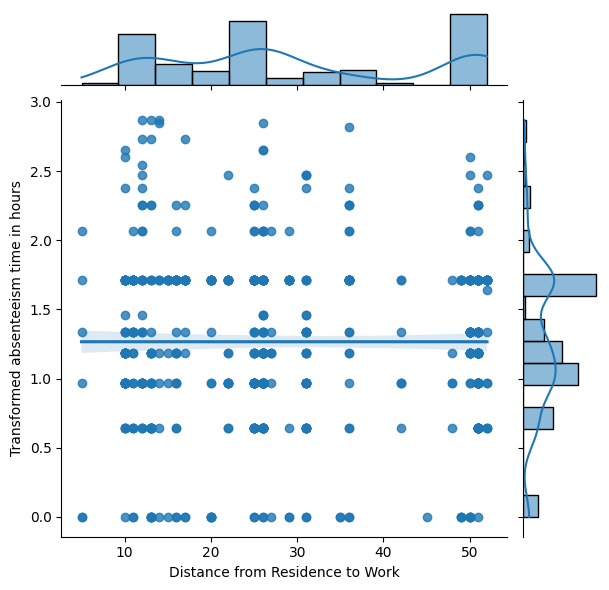

<Figure size 1000x600 with 0 Axes>

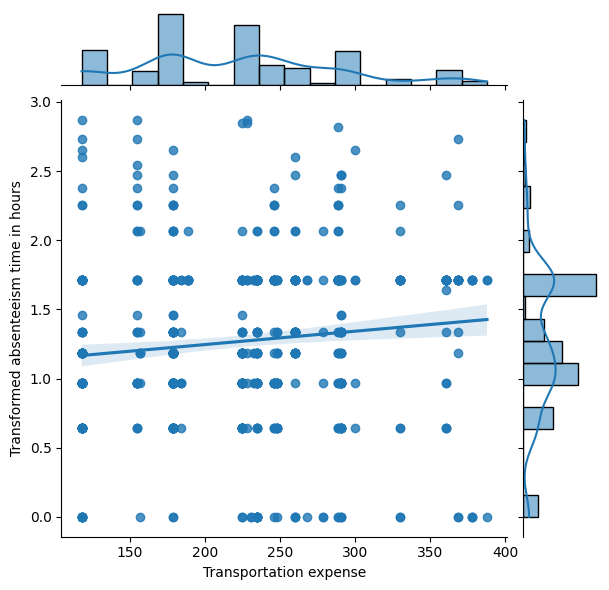

In [144]:
# run Yeo-Johnson transformation and recreate previous plots
from scipy.stats import yeojohnson
hours = yeojohnson(preprocessed_data\
                   ["Absenteeism time in hours"].apply(float))
distances = preprocessed_data["Distance from Residence to Work"]
expenses = preprocessed_data["Transportation expense"]
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=distances, y=hours[0], kind="reg")
ax.set_axis_labels("Distance from Residence to Work",\
 "Transformed absenteeism time in hours")
plt.savefig('figs/distance_vs_hours_transformed.png', format='png')
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=expenses, y=hours[0], kind="reg")
ax.set_axis_labels("Transportation expense", \
 "Transformed absenteeism time in hours")
plt.savefig('figs/costs_vs_hours_transformed.png', format='png')

- we can also see that the regression line between the variables 
is almost flat for the Distance from Residence to Work column (which 
is a clear indicator of zero correlation) but has a slight upward slope for the 
Transportation Expense column.

- However we will calculate the correlation between the two columns and the Hours column.

In [145]:
# investigate correlation between the columns
distance_corr = pearsonr(hours[0], distances)
expenses_corr = pearsonr(hours[0], expenses)
print(f"Distances correlation: corr={distance_corr[0]:.3f}, \
pvalue={distance_corr[1]:.3f}")
print(f"Expenses comparison: corr={expenses_corr[0]:.3f}, \
pvalue={expenses_corr[1]:.3f}")

Distances correlation: corr=-0.000, pvalue=0.999
Expenses comparison: corr=0.113, pvalue=0.002


### Temporal Factors

#### - Day of the week and Month of absence
- From the preceding plots, we can't really see a substantial difference between 
the different days of the week or months. It seems that fewer absences occur on 
Thursday, while the month with the most absences is March, but it is hard to say that 
the difference is significant.

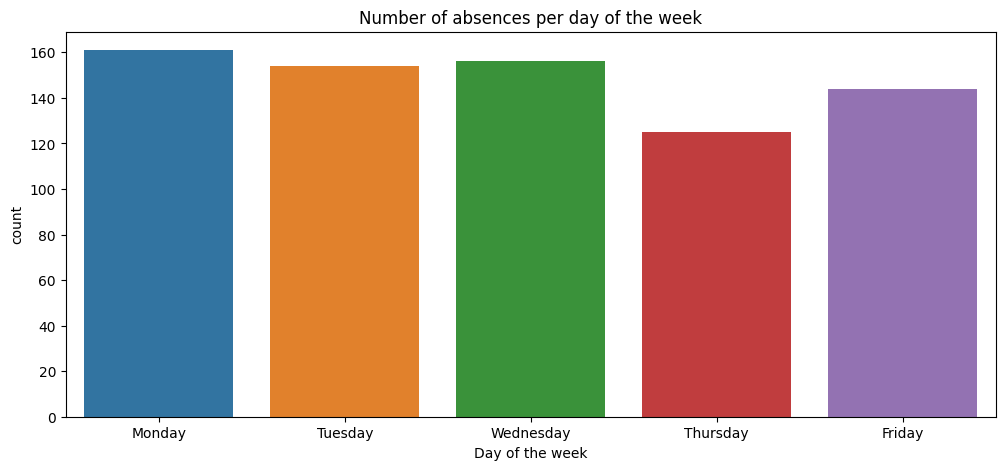

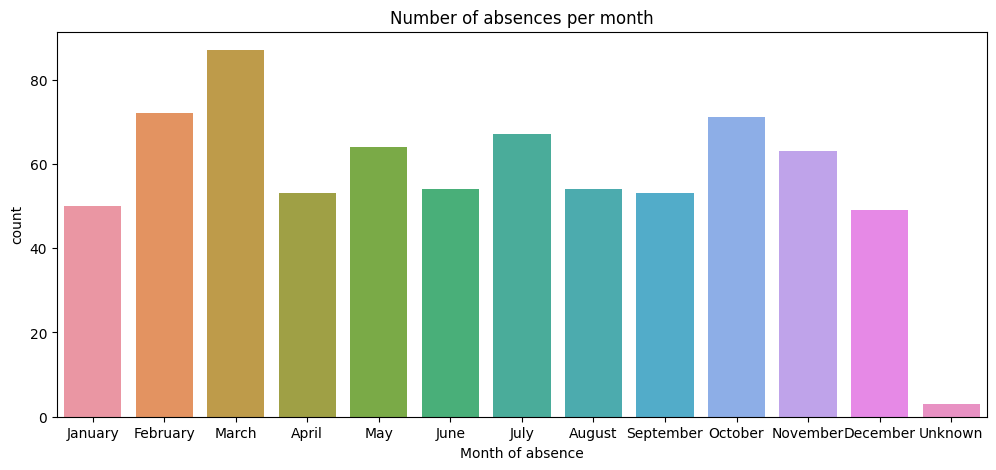

In [146]:
# count entries per day of the week and month
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=preprocessed_data, \
                   x='Day of the week', \
                   order=["Monday", "Tuesday", \
                          "Wednesday", "Thursday", "Friday"])
ax.set_title("Number of absences per day of the week")
plt.savefig('figs/dow_counts.png', format='png', dpi=300)

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=preprocessed_data, \
                   x='Month of absence', \
                   order=["January", "February", "March", \
                          "April", "May", "June", "July", \
"August", "September", "October", \
"November", "December", "Unknown"])
ax.set_title("Number of absences per month")
plt.savefig('figs/month_counts.png', format='png', dpi=300)

- Let's see the distributions of each day and month over the hours  of absence.

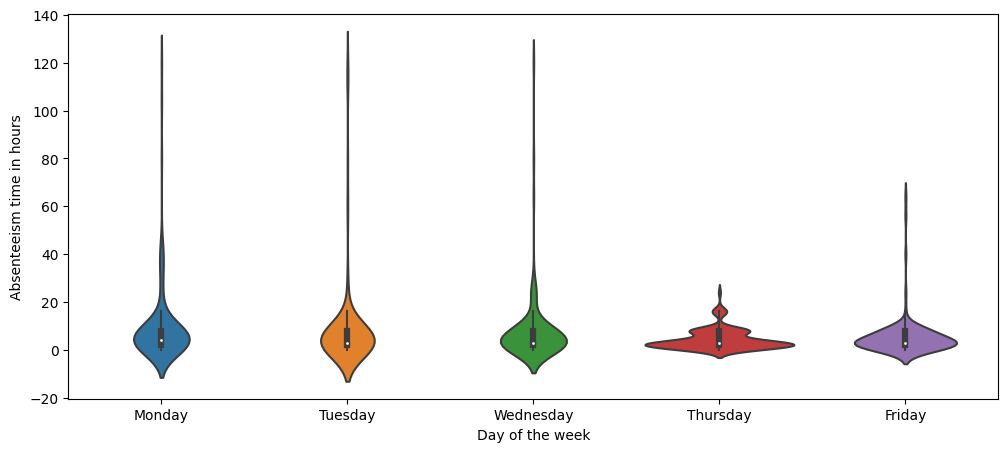

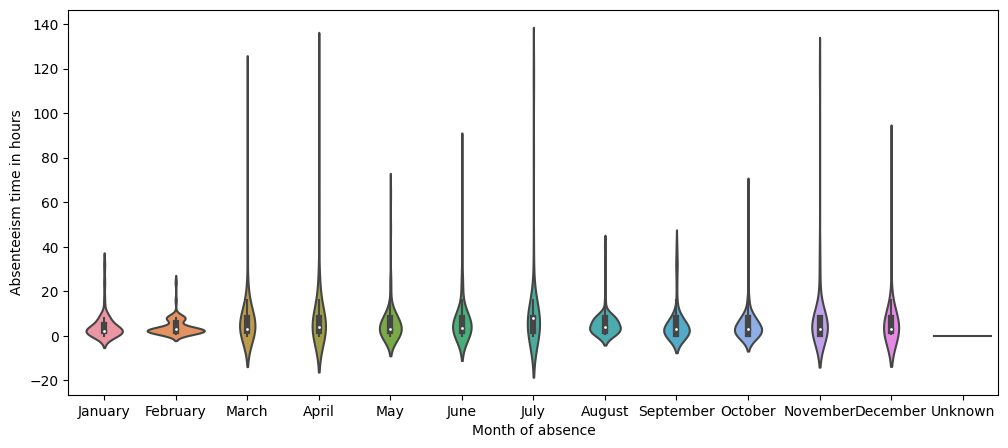

In [147]:
# analyze average distribution of absence hours 
plt.figure(figsize=(12,5))
sns.violinplot(x="Day of the week", \
               y="Absenteeism time in hours",\
               data=preprocessed_data, \
               order=["Monday", "Tuesday", \
                      "Wednesday", "Thursday", "Friday"])
plt.savefig('figs/dow_hours.png', \
            format='png', dpi=300)

plt.figure(figsize=(12,5))
sns.violinplot(x="Month of absence", \
               y="Absenteeism time in hours",\
               data=preprocessed_data, \
               order=["January", "February", \
                      "March", "April", "May", "June", "July",\
"August", "September", "October", \
"November", "December", "Unknown"])
plt.savefig('figs/distribution_month_hours.png', \
            format='png', dpi=300)

- compute mean and standard deviation of absence hours per day of the week

In [148]:
dows = ["Monday", "Tuesday", "Wednesday", \
        "Thursday", "Friday"]
for dow in dows:
    mask = preprocessed_data["Day of the week"] == dow
    hours = preprocessed_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Day of the week: {dow:10s} | Mean : {mean:.03f} \
| Stddev: {stddev:.03f}")


Day of the week: Monday     | Mean : 9.248 | Stddev: 15.973
Day of the week: Tuesday    | Mean : 7.981 | Stddev: 18.027
Day of the week: Wednesday  | Mean : 7.147 | Stddev: 13.268
Day of the week: Thursday   | Mean : 4.424 | Stddev: 4.266
Day of the week: Friday     | Mean : 5.125 | Stddev: 7.911


- compute mean and standard deviation of absence hours per day of the month

In [149]:
months = ["January", "February", "March", "April", "May", \
          "June", "July", "August", "September", "October", \
          "November", "December"]
for month in months:
    mask = preprocessed_data["Month of absence"] == month
    hours = preprocessed_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Month: {month:10s} | Mean : {mean:8.03f} \
| Stddev: {stddev:8.03f}")


Month: January    | Mean :    4.440 | Stddev:    5.786
Month: February   | Mean :    4.083 | Stddev:    3.710
Month: March      | Mean :    8.793 | Stddev:   16.893
Month: April      | Mean :    9.094 | Stddev:   18.024
Month: May        | Mean :    6.250 | Stddev:   10.314
Month: June       | Mean :    7.611 | Stddev:   12.359
Month: July       | Mean :   10.955 | Stddev:   21.547
Month: August     | Mean :    5.333 | Stddev:    5.749
Month: September  | Mean :    5.509 | Stddev:    8.407
Month: October    | Mean :    4.915 | Stddev:    8.055
Month: November   | Mean :    7.508 | Stddev:   16.121
Month: December   | Mean :    8.449 | Stddev:   16.049


- Observe that the average duration of the absences is slightly shorter on 
Thursday (4.424 hours), while absences during July have the longest average 
duration (10.955 hours). To determine whether these values are statistically 
significant—that is, whether there is a statistically significant difference regarding 
the rest of the days/months we will use the t-test in the next cell.

Since the p-values from both the statistical tests are below the critical value of 0.05, we can conclude the following:

• There is a statistically significant difference between Thursdays and other days of the week. Absences on Thursday have a shorter duration, on average.

• Absences during July are the longest over the year. Also, in this case, we can reject the null hypothesis of having no difference.

We can conclude that our initial observations about the difference in absenteeism during the month of July and on Thursdays are correct. Of course, we cannot claim that this is the cause, but only state that certain trends exist in the data. 

In [150]:
from scipy.stats import ttest_ind
# perform statistical test for avg duration difference
thursday_mask = preprocessed_data["Day of the week"] == "Thursday"
july_mask = preprocessed_data["Month of absence"] == "July"

thursday_data = preprocessed_data["Absenteeism time in hours"][thursday_mask]
no_thursday_data = preprocessed_data["Absenteeism time in hours"][~thursday_mask]

july_data = preprocessed_data["Absenteeism time in hours"][july_mask]
no_july_data = preprocessed_data["Absenteeism time in hours"][~july_mask]

thursday_res = ttest_ind(thursday_data, no_thursday_data, alternative='greater')
july_res = ttest_ind(july_data, no_july_data, alternative='less')

print(f"Thursday test result: statistic={thursday_res[0]:.3f}, \
pvalue={thursday_res[1]:.3f}")

print(f"July test result: statistic={july_res[0]:.3f}, \
pvalue={july_res[1]:.3f}")

Thursday test result: statistic=-2.307, pvalue=0.989
July test result: statistic=2.605, pvalue=0.995


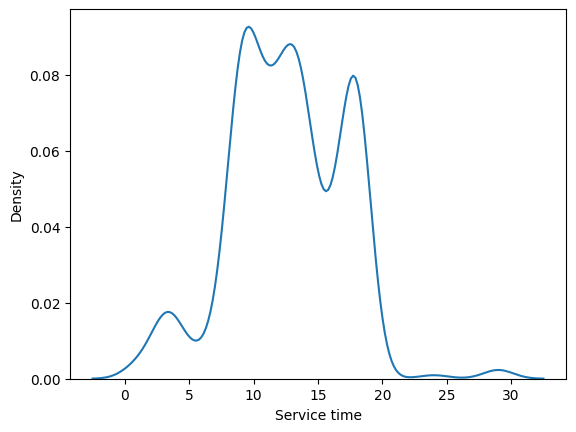

In [151]:
# Analyzing the distribution of Service time column.
sns.kdeplot(data=preprocessed_data, x='Service time')
ax.set_xlabel("Service time")
plt.savefig('figs/kde_plot.png', format='png', dpi=300)

In [152]:
# test distribution for Normality
from scipy.stats import kstest
ks_res = kstest(data["Service time"], "norm")
print(f"Kolmogorov-Smirnov test for normality pvalue: {ks_res[1]:.03f}")

Kolmogorov-Smirnov test for normality pvalue: 0.000


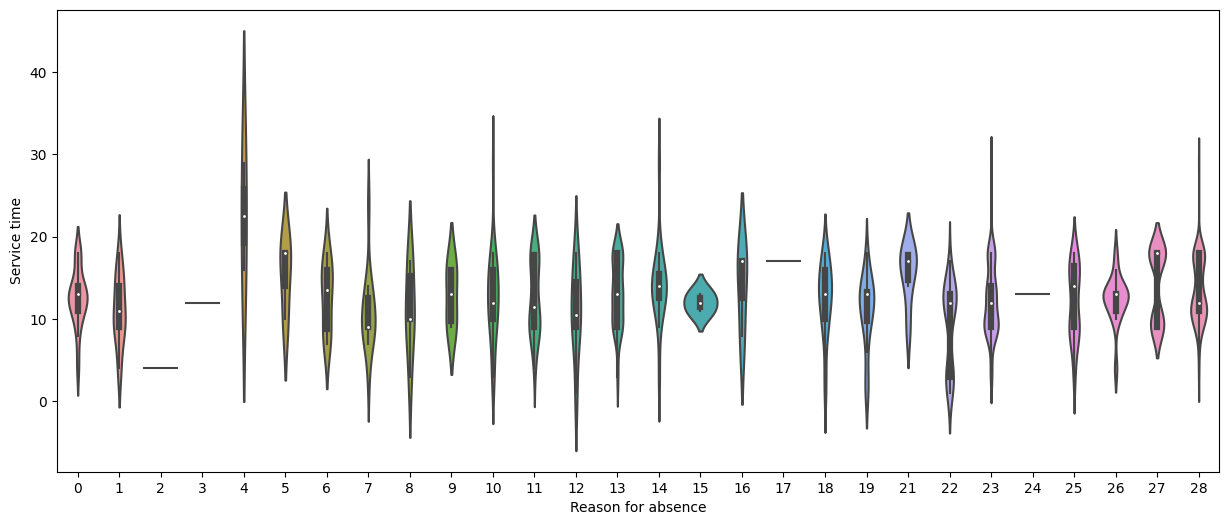

In [153]:
plt.figure(figsize=(15, 6))
sns.violinplot(data=preprocessed_data, x='Reason for absence', y='Service time')
plt.savefig('figs/service_time_vs_absence.png', format='png', dpi=300)

<Figure size 1000x500 with 0 Axes>

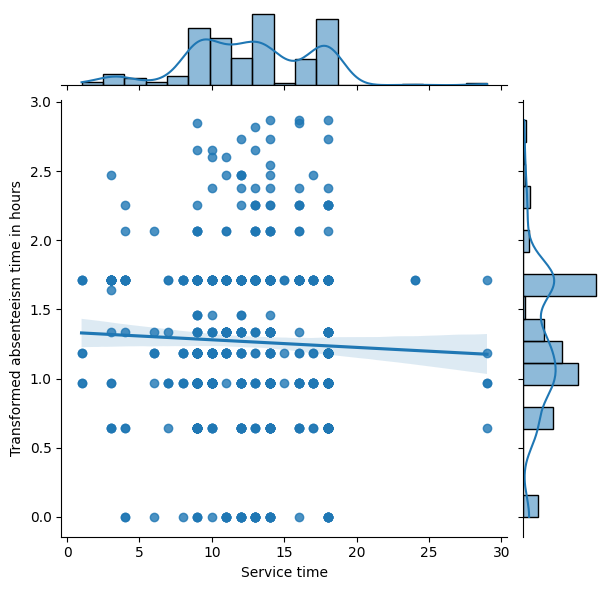

In [154]:
from  scipy.stats import yeojohnson
plt.figure(figsize=(10, 5))
# since Absenteeism time in hours is left skewed then we have to perforom log transformatoion
hours = yeojohnson(preprocessed_data\
                   ["Absenteeism time in hours"].apply(float))
ax = sns.jointplot(x=preprocessed_data['Service time'],\
                y=hours[0],\
                kind='reg')
ax.set_axis_labels("Service time", "Transformed absenteeism time in hours")
plt.savefig('figs/jointplot.png', format='png', dpi=300)

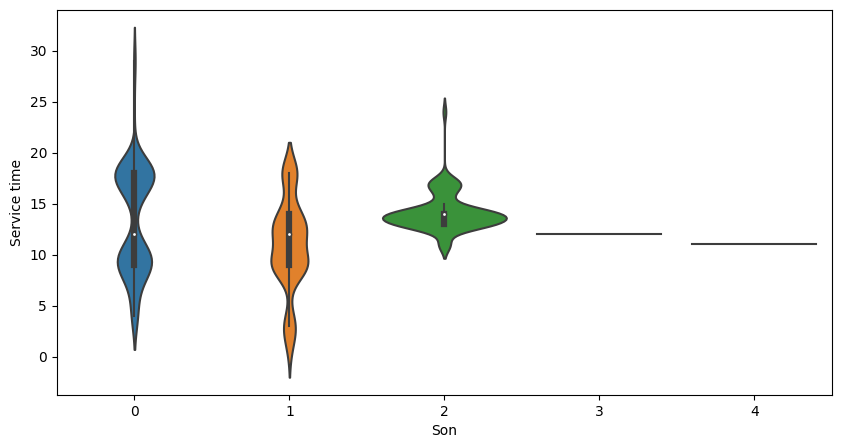

In [155]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=preprocessed_data, x='Son', y='Service time')
plt.savefig('figs/hours_vs_son.png', format='png', dpi=300)